# Gene Inclusion Criteria
- In the GT family
- On both microarrays
- Expressed in over 50% of samples (both microarrays and 
- Not obviously excluded


In [166]:
library(reshape2)
library(ggplot2)
library(dplyr)
library(openxlsx)

gt = na.omit(read.csv('data/raw/human_gt_list.csv')[,1:9])


In [245]:
#gtex = read.csv('/media/ben/9c17f1c9-a45e-49ec-b547-8fbd2f25ccc6/GTEx.v8/expression/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct',skip = 2,sep='\t')
gtex = read.csv('/media/ben/9c17f1c9-a45e-49ec-b547-8fbd2f25ccc6/GTEx.v8/expression/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct',skip = 2,sep='\t')
colnames(gtex) = gsub('\\.','',colnames(gtex))
head(gtex)

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

Name,Description,GTEX1117F0226SM5GZZ7,GTEX1117F0426SM5EGHI,GTEX1117F0526SM5EGHJ,GTEX1117F0626SM5N9CS,GTEX1117F0726SM5GIEN,GTEX1117F1326SM5EGHH,GTEX1117F2426SM5EGGH,GTEX1117F2526SM5GZY6,⋯,GTEXZZPU1126SM5N9CW,GTEXZZPU1226SM5N9CK,GTEXZZPU1326SM5GZWS,GTEXZZPU1426SM5GZZ6,GTEXZZPU1826SM5E43L,GTEXZZPU2126SM5EGIU,GTEXZZPU2226SM5EGIV,GTEXZZPU2426SM5E44I,GTEXZZPU2626SM5E45Y,GTEXZZPU2726SM5NQ8O
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972.5,DDX11L1,0.00000,0.000,0.000,0.00000,0.000,0.0000,0.00000,0.00000,⋯,0.00000,0.03629,0.00000,0.00000,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
ENSG00000227232.5,WASH7P,8.76400,3.861,7.349,11.07000,3.306,5.3890,11.99000,16.95000,⋯,1.60600,2.26800,5.38600,2.31000,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
ENSG00000278267.1,MIR6859-1,0.00000,0.000,1.004,0.00000,0.000,0.0000,0.00000,0.00000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.000,0.06761,0.000,0.0000,0.00000,0.00000,⋯,0.00000,0.00000,0.06073,0.00000,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
ENSG00000237613.2,FAM138A,0.00000,0.000,0.000,0.00000,0.000,0.0000,0.00000,0.03904,⋯,0.02429,0.00000,0.00000,0.00000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
ENSG00000268020.3,OR4G4P,0.00000,0.056,0.000,0.00000,0.000,0.0613,0.09523,0.00000,⋯,0.03526,0.00000,0.00000,0.04624,0.08726,0.0000,0.000,0.00000,0.04044,0.05191


In [191]:
# d1 = read.xlsx('data/raw/data_HMO.xlsx',sheet = 'Gene_of_Interest_corresp_Set1')
# colnames(d1)[1:5] = c('ilmn','gene','genename','syn','ilmn2')
# #d1 = read.csv('data/raw/data_HMO.data_used_gene1.csv')
# head(d1)
# d1 = melt(d1[,c(2,grep('^Patient',colnames(d1)))]) %>% group_by(variable,gene) %>% summarize(value=max(value))
# head(d1)

In [309]:
# grepl('ST3GAL1|ST3GAL3|ST6GALNAC|FUT1$|FUT8$|ST6GALNAC5$',d1$gene)

d1 = read.xlsx('data/raw/data_HMO.xlsx',sheet = 'Gene_of_Interest_corresp_Set1')
colnames(d1)[1:5] = c('ilmn','gene','genename','syn','ilmn2')
#d1 = read.csv('data/raw/data_HMO.data_used_gene1.csv')
#head(d1)
d1 = melt(d1[,c(2,grep('^Patient',colnames(d1)))]) %>% group_by(gene,variable) %>% summarize(value=max(value))
d1$dataset='cohort1'
d1$type = 'microarray'
head(d1)

d2 = read.xlsx('data/raw/data_HMO.xlsx',sheet = 'Gene_of_Interest_corresp_Set2') 
colnames(d2)[1:5] = c('ilmn','gene','ilmn2','genename','ilmn3')
#d2 = read.csv('data/raw/data_HMO.data_used_gene2.csv')
#head(d2)
d2 = melt(d2[,-c(1,3,4,5)]) %>% group_by(gene,variable) %>% summarize(value=max(value))
d2$dataset='cohort2'
d2$type = 'microarray'
head(d2)

ind = read.table('data/raw/GSE45669_master_allPE_genelevel_FPKM.txt',header=T)
ind = cbind(ind[,1:2],apply(ind[,-(1:2)],2,function(x) (x/sum(x))*1e6))
colnames(ind)[1] = 'gene'
ind = melt(ind[,c(1,which(grepl('^X',colnames(ind)))) ])
ind$dataset='External'
ind$type = 'RNAseq'
ind$gene_group=NA
head(ind)

dat = rbind(d1,d2)
head(dat)

Using gene as id variables


gene,variable,value,dataset,type
<chr>,<fct>,<dbl>,<chr>,<chr>
B3GALNT1,Patient_1_6h,133.9398,cohort1,microarray
B3GALNT1,Patient_1_12h,121.6139,cohort1,microarray
B3GALNT1,Patient_1_24h,120.5912,cohort1,microarray
B3GALNT1,Patient_1_36h,126.8574,cohort1,microarray
B3GALNT1,Patient_1_48h,126.0238,cohort1,microarray
B3GALNT1,Patient_1_60h,129.8490,cohort1,microarray


Using gene as id variables


gene,variable,value,dataset,type
<chr>,<fct>,<dbl>,<chr>,<chr>
B3GALNT2,LD.D1.8AM,107.5104,cohort2,microarray
B3GALNT2,LD.D2.8AM,113.0929,cohort2,microarray
B3GALNT2,RM.D1.8AM,109.3778,cohort2,microarray
B3GALNT2,RM.D2.8AM,124.0266,cohort2,microarray
B3GALNT2,SP.D1.8AM,109.3028,cohort2,microarray
B3GALNT2,SP.D2.8AM,116.9742,cohort2,microarray


Using gene as id variables


gene,variable,value,dataset,type,gene_group
<fct>,<fct>,<dbl>,<chr>,<chr>,<lgl>
FAM138A,X153.C_RNA_m0_0,0.000000,External,RNAseq,NA
OR4F5,X153.C_RNA_m0_0,0.000000,External,RNAseq,NA
OR4F29,X153.C_RNA_m0_0,0.000000,External,RNAseq,NA
WASH7P,X153.C_RNA_m0_0,18.692847,External,RNAseq,NA
LOC729737,X153.C_RNA_m0_0,8.386366,External,RNAseq,NA
OR4F29,X153.C_RNA_m0_0,0.000000,External,RNAseq,NA


Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

gene,variable,value,dataset,type
<chr>,<chr>,<dbl>,<chr>,<chr>
B3GALNT1,Patient_1_6h,133.9398,cohort1,microarray
B3GALNT1,Patient_1_12h,121.6139,cohort1,microarray
B3GALNT1,Patient_1_24h,120.5912,cohort1,microarray
B3GALNT1,Patient_1_36h,126.8574,cohort1,microarray
B3GALNT1,Patient_1_48h,126.0238,cohort1,microarray
B3GALNT1,Patient_1_60h,129.8490,cohort1,microarray


In [310]:

for(i in 1:2){
    print(i)
    dat$gene = gsub('-','',
                    ifelse(substr(dat$gene,nchar(as.character(dat$gene)),nchar(as.character(dat$gene)))%in%letters & !grepl('GCNT2',dat$gene),
                           substr(dat$gene,1,nchar(as.character(dat$gene))-1),
                        as.character(dat$gene)))

    dat = dat %>% group_by(type,dataset,variable,gene) %>% summarize(value=max(value,na.rm=T))
    dat$gene_group = toupper(gsub('[0-9]+$','',dat$gene))
    dat$gene_group[grepl('GCNT2',dat$gene_group)] = 'GCNT'

    dat = dat[!dat$gene_group%in%c('OGT','POFUT','B3GALNT','LALBA','LOC')&!grepl('MGAT|GALNT|TL$',dat$gene_group),]
#stop()
    if(i==1){
        ind = ind[grepl(paste(unique(dat$gene_group),collapse='|'),ind$gene),c('type','dataset','variable','gene','value','gene_group')]
        dat = rbind(as.data.frame(dat),ind)
    }
}
dat$gene = toupper(dat$gene)
dat = dat[!dat$gene%in%c('B3GNT1','FUT8','GCNT6','GCNT2E'),]

dat$Prudden = dat$gene %in% c('FUT1','FUT3','FUT5','FUT9','B3GNT2','B3GALT5','GCNT2B','ST3GAL4','ST6GAL1','ST6GALNAC5')

dat = droplevels(dat[!grepl('^SUGT|^UGT',dat$gene_group),])

head(dat)

[1] 1
[1] 2


type,dataset,variable,gene,value,gene_group,Prudden
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>
microarray,cohort1,Patient_1_12h,B3GALT1,0.0000,B3GALT,FALSE
microarray,cohort1,Patient_1_12h,B3GALT2,0.0000,B3GALT,FALSE
microarray,cohort1,Patient_1_12h,B3GALT3,0.0000,B3GALT,FALSE
microarray,cohort1,Patient_1_12h,B3GALT4,123.7084,B3GALT,FALSE
microarray,cohort1,Patient_1_12h,B3GALT5,0.0000,B3GALT,TRUE
microarray,cohort1,Patient_1_12h,B3GALT6,152.9320,B3GALT,FALSE


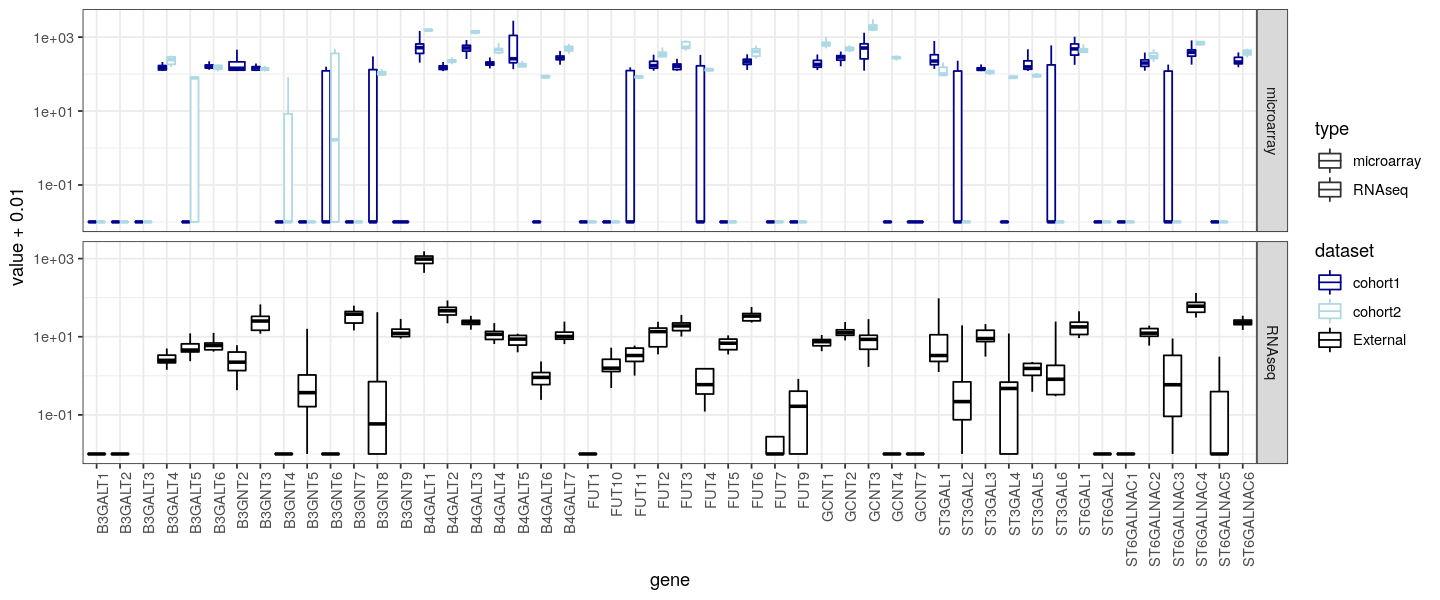

In [316]:

options(repr.plot.width=12, repr.plot.height=5)


ggplot(dat,aes(x=gene,y=value+.01,color=dataset,shape=type))+
  geom_boxplot(outlier.shape = NA,notchwidth = 0)+#geom_point(size=1,position=position_dodge(width=.75))+
  scale_y_log10()+facet_grid(type~.,scale='free')+
  #facet_grid(type~gene_group,scale='free')+
  scale_color_manual(values = c('darkblue','lightblue','black'))+
  theme_bw()+  theme(axis.text.x = element_text(angle = 90,hjust = 1))

#out = dat %>% group_by(type,dataset,variable,gene) %>% summarize(value=max(value,na.rm=T))

In [342]:
g='FUT8'
rna=quantile(ind$value[ind$gene==g],.75)
rna
paste(quantile(gtex[gtex$Description==g,-(1:2)]),collapse = '-')
ecdf(gtex[gtex$Description==g,-(1:2)])(rna)
log2((rna+1e-4)/(quantile(gtex[gtex$Description==g,-(1:2)],.75)+1e-4))

75% 
2.531299

[1] "0.02636-4.091-6.6685-10.64-104.5"

[1] 0.1493499

,75%
,<dbl>
37648,-2.071505


In [317]:
out=merge(gt,dcast(gene_group+gene+Prudden~type+dataset,data = dat,fun.aggregate = function(x) quantile(x,probs = .75,na.rm=T)),by.x='Gene.Symbol',by.y='gene',all.y=T)
                   
out$gtex_quantiles = sapply(as.character(out$Gene.Symbol),function(g){
    ret = NA
    try(ret<-paste(quantile(gtex[gtex$Description==g,-(1:2)]),collapse = '-'))
    return(ret)
})
out$rnaseq_perc = sapply(as.character(out$Gene.Symbol),function(g){
    ret = NA
    try(ret<-ecdf(gtex[gtex$Description==g,-(1:2)])(out$RNAseq_External[out$Gene.Symbol==g]))
    return(ret)
})
                   
out$rnaseq_lfc = unlist(sapply(as.character(out$Gene.Symbol),function(g){
    ret = NA
    try(ret<-log2((out$RNAseq_External[out$Gene.Symbol==g]+1e-4)/(quantile(gtex[gtex$Description==g,-(1:2)],.75)+1e-4)))
    return(ret)
}))

# removed due to microarray
out$NAs = apply(out[,c('microarray_cohort1','microarray_cohort2')],1,function(x) sum(is.na(x)))
out$Q3zero = apply(out[,c('microarray_cohort1','microarray_cohort2')],1,function(x) sum(na.omit(x==0)))
                   
out$removed = ifelse(out$NAs==2,
                     'missing on both microarrays',
                     ifelse(out$NAs==1,
                         'missing on one microarray',
                         ifelse(out$Q3zero>=1,
                             'median zero on both microarray',
                             'keep'
                         )))
out$removal_check_rnaseq = ifelse(out$removed=='keep','keep',
                                 ifelse(is.na(out$RNAseq_External)||out$RNAseq_External<1,'validated','contested'))
out$removal_check_pruden = ifelse(out$removed=='keep','keep',
                                 ifelse(!out$Prudden , 'validated','contested'))
out$removal_check = ifelse( (out$removal_check_rnaseq == out$removal_check_pruden)|
                            (out$removal_check_rnaseq =='contested' & out$removal_check_pruden =='contested') ,'check_validated','check_contested')
                   

                   
out
write.csv(out,file='data_out/Candidate_Gene_Validation.csv')        
#tmp[apply(tmp[,3:4],1,function(x) sum(is.na(x))+sum(na.omit(x)==0))==2 & tmp[,5]>0 & !is.na(tmp[,5]),]
                   
                   


Error in `[.data.frame`(x, lo) : undefined columns selected
Error in ecdf(gtex[gtex$Description == g, -(1:2)]) : 
  'x' must have 1 or more non-missing values
Error in `[.data.frame`(x, lo) : undefined columns selected


Gene.Symbol,CAZy,Synonym,Uniprot,DNA.RefSeq,Protein.RefSeq,Gene_ID,MGC,Description,gene_group,⋯,RNAseq_External,gtex_quantiles,rnaseq_perc,rnaseq_lfc,NAs,Q3zero,removed,removal_check_rnaseq,removal_check_pruden,removal_check
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
B3GALT1,GT31,,Q9Y5Z6,NM_020981,NP_066191,8708,BC101545,"Beta-1,3-galactosyltransferase 1",B3GALT,⋯,0.0000000,0-0.0961475-0.3209-1.25275-79.92,0.0586813945,-13.612926075,0,2,median zero on both microarray,validated,validated,check_validated
B3GALT2,GT31,,O43825,NM_003783,NP_003774,8707,BC022507,"Beta-1,3-galactosyltransferase 2",B3GALT,⋯,0.0000000,0-0.22515-0.6793-2.61975-115.6,0.0128293637,-14.677196592,0,2,median zero on both microarray,validated,validated,check_validated
B3GALT3,GT31,B3GALNT1,O75752,NM_003781,NP_003772,8706,BC028571,"UDP-GalNAc:beta-1,3-N-acetylgalactosaminyltransferase 1",B3GALT,⋯,NA,NA,NA,NA,0,2,median zero on both microarray,validated,validated,check_validated
B3GALT4,GT31,GALT4,O96024,NM_003782,NP_003773,8705,BC032574,"Beta-1,3-galactosyltransferase 4",B3GALT,⋯,3.3691069,0.153-4.631-10.48-15.6-109.6,0.1767920838,-2.211074365,0,0,keep,keep,keep,check_validated
B3GALT5,GT31,,Q9Y2C3,NM_006057,NP_006048,10317,BC104862,"Beta-1,3-galactosyltransferase 5",B3GALT,⋯,6.5637111,0-0.02428-0.16225-0.8487-93.15,0.9664595559,2.951037163,0,1,median zero on both microarray,validated,contested,check_contested
B3GALT6,GT31,,Q96L58,NM_080605,NP_542172,126792,BC160034,"Beta-1,3-galactosyltransferase 6",B3GALT,⋯,6.9130684,0.1857-9.02925-12.96-17.17-80.12,0.1433667012,-1.312479476,0,0,keep,keep,keep,check_validated
B3GNT2,GT31,"B3GALT7, B3GNT1",Q9NY97,NM_006577,NP_006568,10678,BC030579,"UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 2",B3GNT,⋯,4.1671062,0.2553-7.718-13.55-21.41-416.8,0.1166148890,-2.361139139,1,0,missing on one microarray,validated,contested,check_contested
B3GNT3,GT31,"B3GALT8, TMEM3",Q9Y2A9,NM_014256,NP_055071,10331,BC066876,"UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 3",B3GNT,⋯,33.3125282,0-0.02339-0.13225-1.008-203.9,0.9496030376,5.046358520,0,0,keep,keep,keep,check_validated
B3GNT4,GT31,,Q9C0J1,NM_030765,NP_110392,79369,BC031399,"UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 4",B3GNT,⋯,0.0000000,0-0.109925-0.23685-0.82115-10.92,0.0090898631,-13.003605750,0,1,median zero on both microarray,validated,validated,check_validated


Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_text_repel).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_text_repel).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_text_repel).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_text_repel).”

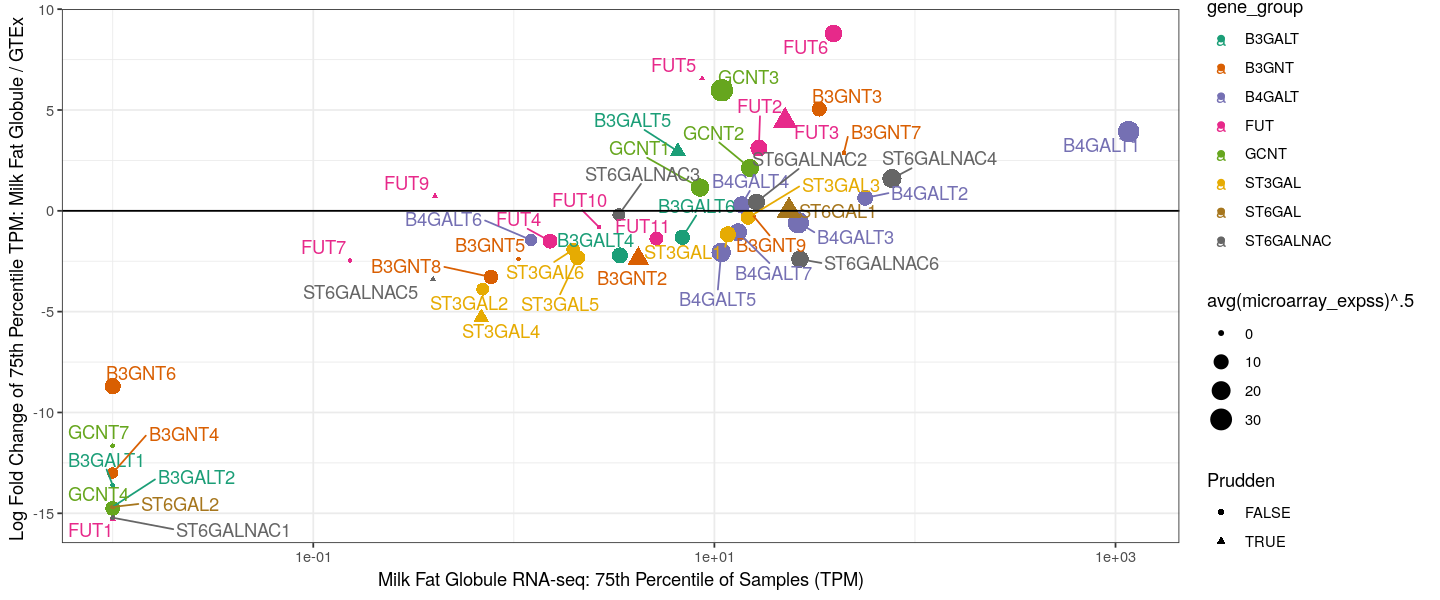

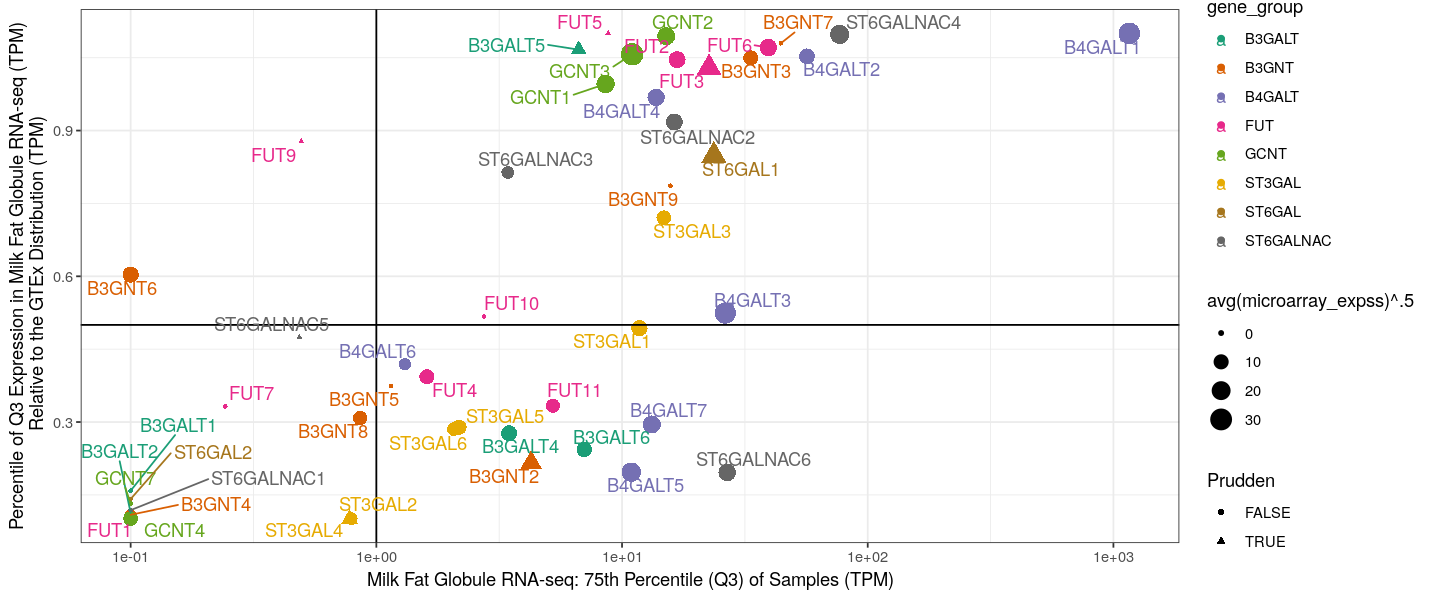

In [347]:
library(ggrepel)

options(repr.plot.width=12, repr.plot.height=5)

out$sqrt_avg_microarray = apply(out[,c('microarray_cohort1','microarray_cohort2')],1,mean,na.rm=T)^.5

#ggplot(out,aes(x=RNAseq_External+1e-3,y=rnaseq_perc+1e-3,color=gene_group,shape=Prudden,label=ifelse(RNAseq_External+sqrt(rnaseq_perc)+sqrt(microarray_cohort1+microarray_cohort2)>0.1,as.character(Gene.Symbol),NA)))+
g=ggplot(out,aes(x=RNAseq_External+1e-2,y=rnaseq_lfc,color=gene_group,label=Gene.Symbol,shape=Prudden))+
    geom_point(aes(size=sqrt_avg_microarray))+
    scale_color_brewer(palette = 'Dark2')+
    #geom_point()+
    geom_text_repel()+geom_hline(yintercept = 0)+
    guides(size = guide_legend(title ='avg(microarray_expss)^.5'))+
    xlab('Milk Fat Globule RNA-seq: 75th Percentile of Samples (TPM)')+ylab('Log Fold Change of 75th Percentile TPM: Milk Fat Globule / GTEx ')+
    #geom_line(aes(group=gene_group),alpha=.5)+
    #scale_y_log10()+
    scale_x_log10()+#facet_wrap(~gene_group)+
    theme_bw()

ggsave(g,filename='data_out/Candidate_Gene_Validation3.pdf',height=5,width=10)
g

#ggplot(out,aes(x=RNAseq_External+1e-3,y=rnaseq_perc+1e-3,color=gene_group,shape=Prudden,label=ifelse(RNAseq_External+sqrt(rnaseq_perc)+sqrt(microarray_cohort1+microarray_cohort2)>0.1,as.character(Gene.Symbol),NA)))+
g=ggplot(out,aes(x=RNAseq_External+1e-1,y=rnaseq_perc+1e-1,color=gene_group,label=Gene.Symbol,shape=Prudden))+
    geom_point(aes(size=sqrt_avg_microarray))+
    guides(size = guide_legend(title ='avg(microarray_expss)^.5'))+
    geom_hline(yintercept = .5)+geom_vline(xintercept = 1)+
    geom_text_repel()+scale_color_brewer(palette = 'Dark2')+
    xlab('Milk Fat Globule RNA-seq: 75th Percentile (Q3) of Samples (TPM)')+ylab('Percentile of Q3 Expression in Milk Fat Globule RNA-seq (TPM)\n Relative to the GTEx Distribution (TPM)')+
    #geom_line(aes(group=gene_group),alpha=.5)+
    #scale_y_log10()+
    scale_x_log10()+theme_bw()

ggsave(g,filename='data_out/Candidate_Gene_Validation4.pdf',height=5,width=10)
g

Warning message:
“Removed 30 rows containing non-finite values (stat_density).”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 30 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 30 rows containing missing values”Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 30 rows containing missing values (geom_point).”Warning message:
“Removed 30 rows containing non-finite values (stat_density).”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 30 rows containing missing values”Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 30 rows containing missing values (geom_point).”Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 30 rows containing missing values (geom_poin

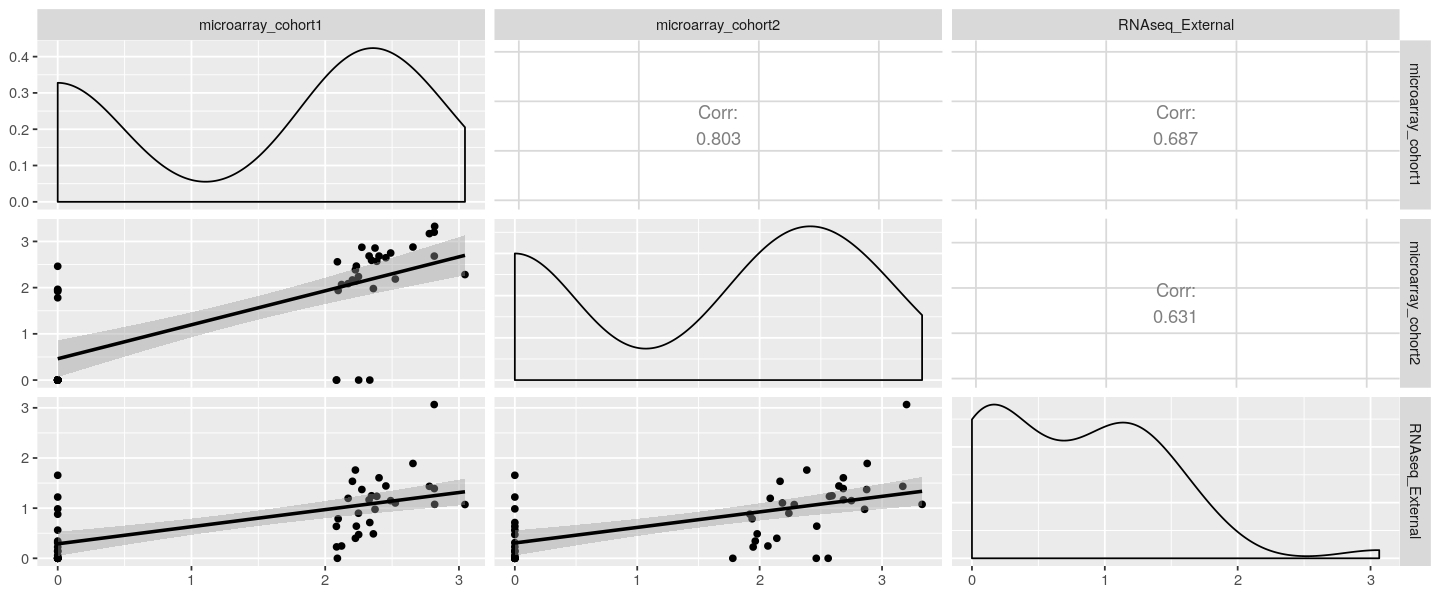

Warning message:
“Removed 30 rows containing non-finite values (stat_density).”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 30 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 30 rows containing missing values”Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 30 rows containing missing values (geom_point).”Warning message:
“Removed 30 rows containing non-finite values (stat_density).”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 30 rows containing missing values”Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 30 rows containing missing values (geom_point).”Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 30 rows containing missing values (geom_poin

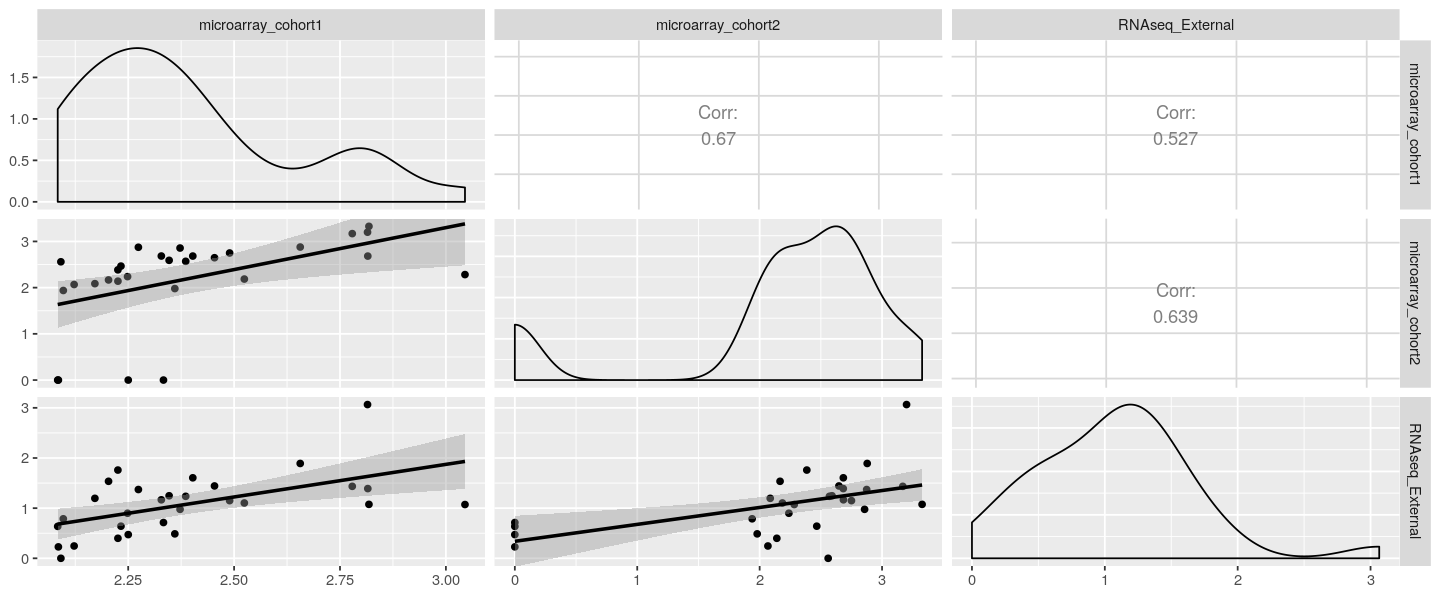

In [345]:
tmp = out[!grepl('GCNT2',as.character(out$Gene.Symbol)),grepl('microarray|RNAseq',colnames(out))]
tmp[is.na(tmp)]=0

g1=ggpairs(log10(tmp+1), lower=list(continuous='smooth'),
        upper = list(continuous = wrap("cor", method= "spearman")))

g2=ggpairs(log10(tmp[tmp[,1:2]>1,]+1), lower=list(continuous='smooth'),
        upper = list(continuous = wrap("cor", method= "spearman")))

g1
g2

ggsave(g1,filename='data_out/Candidate_Gene_Validation1.pdf',height=7,width=7)
ggsave(g2,filename='data_out/Candidate_Gene_Validation2.pdf',height=7,width=7)

In [2]:
library(openxlsx)
r = read.xlsx('data_out/Table S2 - Reaction_Networks.xlsx',sheet=2)
r$met2 = gsub(';.*','',r$metabolites)
r$iupac=sapply(r$met2,function(i) system(paste0("java -jar /media/ben/9c17f1c9-a45e-49ec-b547-8fbd2f25ccc6//lib/GlycanFormatConverter//target/glycanformatconverter.jar -i LinearCode -e IUPAC-Condensed -seq '",i,"'"),intern=T))

head(r)
               
library(reticulate)
matlab = import('matlab')
DrawGlycanSNFG = import('DrawGlycanSNFG') 


for(i in 1:nrow(r)){
    dg=DrawGlycanSNFG$initialize()
    dg$drawglycan(r$iupac[i],'fileout',paste0('figures/glycans/',r$met2[i],'.',r$label[i],'.pdf'),'visible','off','showlink','yes' )
}

metabolites,id,label,in_percentile_95th_path,importance.edge_weight_sum,degree,depth,met2,iupac
<chr>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Ab4G;HMO[c],1,Lactose,TRUE,2.0793165,4,1,Ab4G,Gal(b1-4)Glc(?1-
GNb3Ab4G;HMO[c],2,2,TRUE,2.5196318,5,2,GNb3Ab4G,GlcNAc(b1-3)Gal(b1-4)Glc(?1-
Fa2Ab4G;HMO[c],3,2FL,TRUE,0.5198291,1,2,Fa2Ab4G,Fuc(a1-2)Gal(b1-4)Glc(?1-
Ab4(Fa3)G;HMO[c],4,3FL,TRUE,0.5799085,2,2,Ab4(Fa3)G,Gal(b1-4)[Fuc(a1-3)]Glc(?1-
NNa3Ab4G;HMO[c],5,3SL,TRUE,0.5198291,1,2,NNa3Ab4G,Neu5Ac(a2-3)Gal(b1-4)Glc(?1-
Ab3GNb3Ab4G;HMO[c],6,LNT,TRUE,2.2654144,7,3,Ab3GNb3Ab4G,Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)Glc(?1-


ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): MatlabRuntimeError: An error occurred when evaluating the result from a function. Details: 
  File /home/ben/.mcrCache9.5/DrawGl0/DrawGlycanSN/Dcurrent/getglydressing.m, line 76, in getglydressing

  File /home/ben/.mcrCache9.5/DrawGl0/DrawGlycanSN/Dcurrent/drawglycan.m, line 132, in drawglycan
Invalid data type. First argument must be numeric or logical.


Detailed traceback: 
  File "/usr/local/MATLAB/MATLAB_Runtime/v95/toolbox/compiler_sdk/pysdk_py/matlab_pysdk/runtime/deployablefunc.py", line 80, in __call__
    nlhsWasSpecified, stdoutObj, stderrObj).result()
  File "/usr/local/MATLAB/MATLAB_Runtime/v95/toolbox/compiler_sdk/pysdk_py/matlab_pysdk/runtime/futureresult.py", line 135, in result
    raise e



In [3]:
r[r$label %in% c('FLNH5', 'DFLNT2', 'DFLNH7', 'DSLNH2'),]

,metabolites,id,label,in_percentile_95th_path,importance.edge_weight_sum,degree,depth,met2,iupac
,<chr>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
29,Ab3(Fa4)GNb3Ab4(Fa3)G;HMO[c],29,DFLNT2,TRUE,1.6039500,3,5,Ab3(Fa4)GNb3Ab4(Fa3)G,Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]Glc(?1-
49,Ab3(Fa4)GNb3(Ab4GNb6)Ab4G;HMO[c],49,FLNH5,FALSE,0.5765240,7,6,Ab3(Fa4)GNb3(Ab4GNb6)Ab4G,Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Gal(b1-4)Glc(?1-
70,Fa2Ab3(Fa4)GNb3(Ab4GNb6)Ab4G;HMO[c],70,DFLNH7,FALSE,0.2240593,4,7,Fa2Ab3(Fa4)GNb3(Ab4GNb6)Ab4G,Fuc(a1-2)Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Gal(b1-4)Glc(?1-
77,NNa3Ab3(NNa6)GNb3(Ab4GNb6)Ab4G;HMO[c],77,DSLNH2,TRUE,2.0224040,5,7,NNa3Ab3(NNa6)GNb3(Ab4GNb6)Ab4G,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Gal(b1-4)Glc(?1-
